1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.integrate import trapz

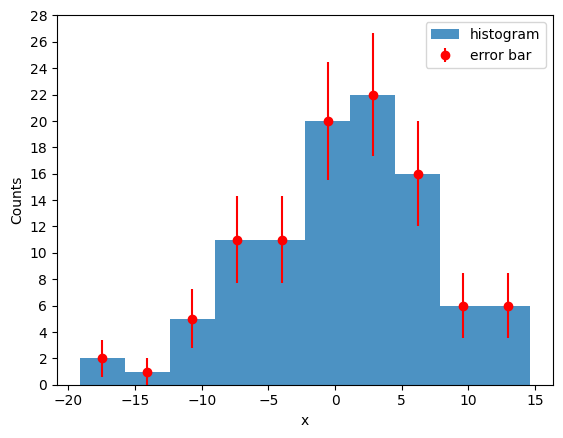

In [2]:
N=100
x = np.random.normal(size=N, loc=1.5, scale=7)

counts, bins = np.histogram(x, bins=int(np.sqrt(N)))

err = np.sqrt(counts)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.hist(x, bins=int(np.sqrt(N)), alpha=0.8, label='histogram')
plt.errorbar(bin_centers, counts, yerr=err, fmt='o', label='error bar', color='red')

plt.xlabel('x')
plt.ylabel('Counts')
plt.yticks(np.arange(0, (np.max(counts)+np.max(err))+3, 2))
plt.legend()
plt.show()

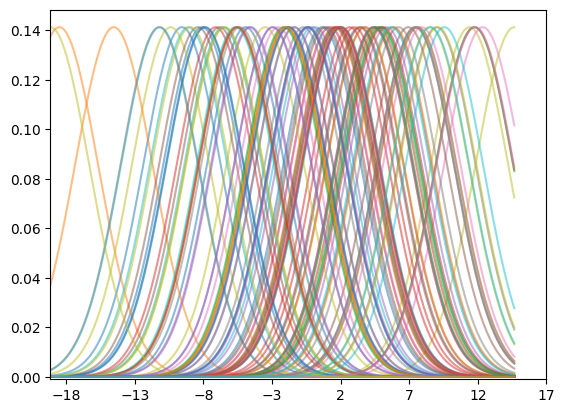

In [3]:
means = x
std = 1.06 * x.std() * x.size**(-1/5)

t = np.linspace(x.min(), x.max(), 300)
gaussians = stats.norm.pdf(t[:,None], loc=means, scale=std).T

for gaussian in gaussians:
    plt.plot(t, gaussian, alpha=0.5)

plt.xlim(x.min(), x.max())
plt.xticks(np.arange(int(x.min())+1, int(x.max())+5, 5))
plt.ylim(-0.001)
plt.show()
    

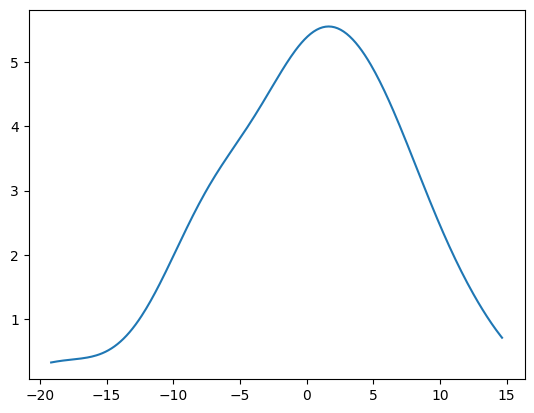

In [4]:
tot_gauss = np.sum(gaussians, axis=0)

plt.plot(t, tot_gauss)
plt.show()

Integral of the histogram:  324.53745512732945
Integral of the gaussian:  97.58031223863453


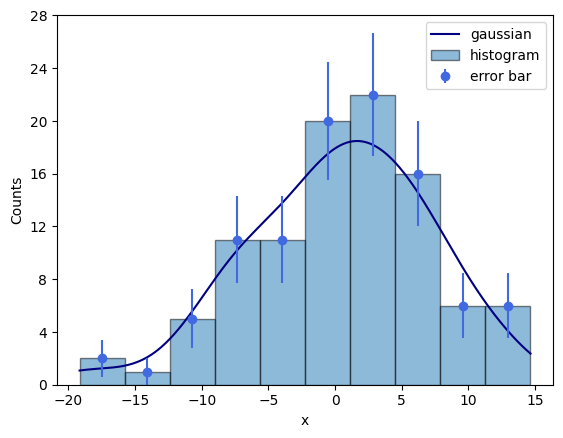

In [5]:
tot_gauss_int = trapz(tot_gauss, t)
x_int = trapz(counts, bin_centers)

print('Integral of the histogram: ', x_int)
print('Integral of the gaussian: ', tot_gauss_int)

a = x_int / tot_gauss_int

plt.plot(t, tot_gauss * a, label='gaussian', color='navy')
plt.hist(x, bins=int(np.sqrt(N)), alpha=0.5, label='histogram', color='tab:blue', edgecolor='black', linewidth=1)
plt.errorbar(bin_centers, counts, yerr=err, fmt='o', label='error bar', color='royalblue')

plt.xlabel('x')
plt.ylabel('Counts')
plt.yticks(np.arange(0, (np.max(counts)+np.max(err))+3, 4))
plt.legend()
plt.show()


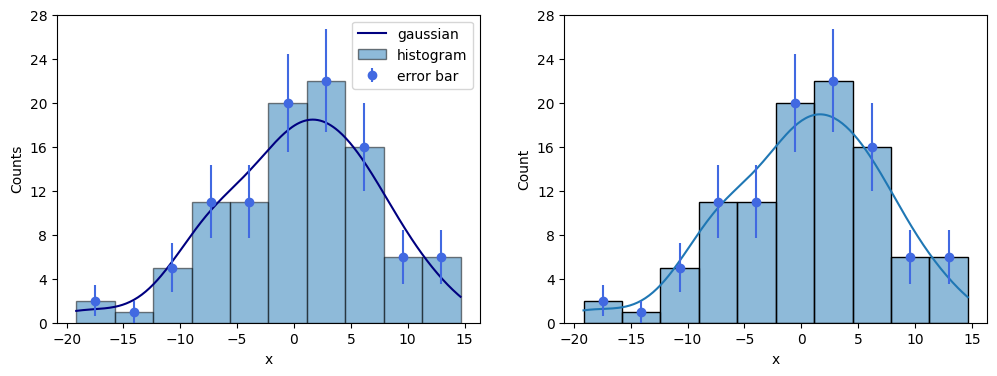

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

dff = pd.DataFrame({'x':x})

ax[0].plot(t, tot_gauss * a, label='gaussian', color='navy')
ax[0].hist(x, bins=int(np.sqrt(N)), alpha=0.5, label='histogram', color='tab:blue', edgecolor='black', linewidth=1)
ax[0].errorbar(bin_centers, counts, yerr=err, fmt='o', label='error bar', color='royalblue')

ax[0].set_xlabel('x')
ax[0].set_ylabel('Counts')
ax[0].set_yticks(np.arange(0, (np.max(counts)+np.max(err))+3, 4))
ax[0].legend()

sns.histplot(data=dff, x='x', bins=10, kde=True, color='tab:blue', ax=ax[1])
ax[1].errorbar(bin_centers, counts, yerr=err, fmt='o', label='error bar', color='royalblue')
# ax[1].xlabel('x')
# ax[1].ylabel('Counts')
ax[1].set_yticks(np.arange(0, (np.max(counts)+np.max(err))+3, 4))
# ax[1].legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

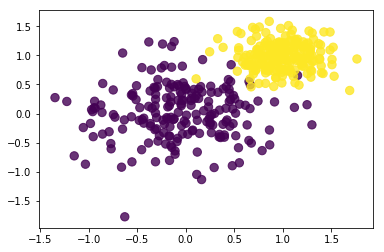

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

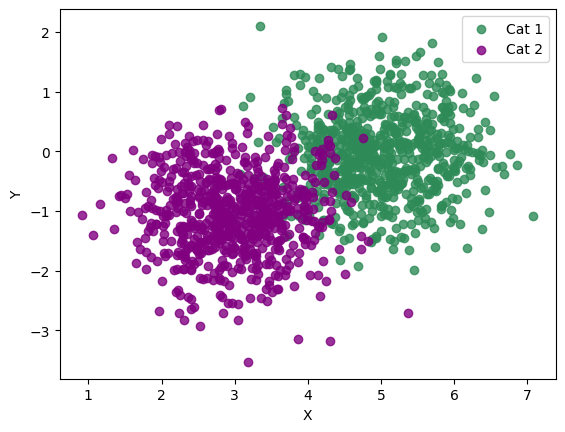

In [6]:
def distr_2d(mean1, mean2, cov, size):
    # Generate data for category 1
    data1 = np.random.multivariate_normal(mean1, cov, size)
    
    # Generate data for category 2
    data2 = np.random.multivariate_normal(mean2, cov, size)
    
    # Combine the data from both categories
    dataset = np.concatenate((data1, data2))
    
    return dataset

# Define the means and standard deviations for the two categories
mean1 = [5, 0]
mean2 = [3, -1]
cov = np.diag([0.5, 0.5])
size=700

# Generate the dataset
dataset = distr_2d(mean1, mean2, cov, size=size)

# Separate the data points for each category
category1 = dataset[:size]
category2 = dataset[size:]

# Plot the scatter plot
plt.scatter(category1[:, 0], category1[:, 1], c='seagreen', alpha=0.8, label='Cat 1')
plt.scatter(category2[:, 0], category2[:, 1], c='purple', alpha=0.8, label='Cat 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [8]:
data = np.load('data07/residuals_261.npy', allow_pickle=True).item()

df = pd.DataFrame(data)
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [9]:
df_clean = df[np.abs(df['residuals']) < 2]
df_clean.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


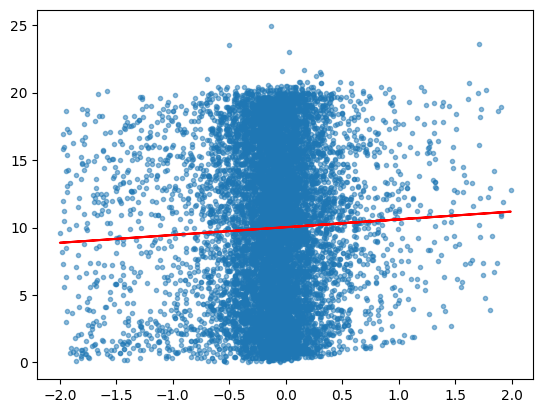

In [13]:
lin_regr = stats.linregress(df_clean['residuals'], df_clean['distances'])
 
plt.plot(df_clean['residuals'], df_clean['distances'], '.', alpha=0.5)
plt.plot(df_clean['residuals'], lin_regr.intercept + lin_regr.slope * df_clean['residuals'], 'r-')
plt.show()

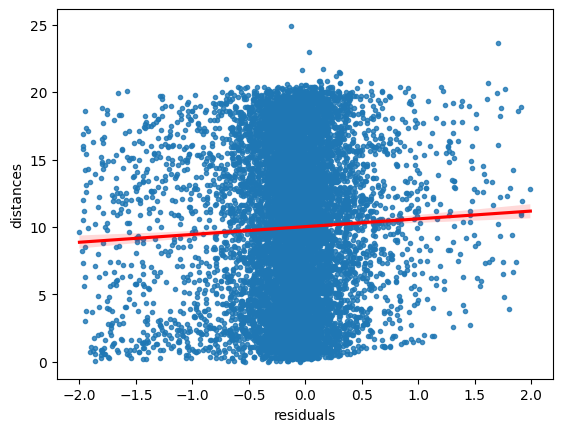

In [15]:
sns.regplot(x='residuals', y='distances', data=df_clean, marker=".", line_kws=dict(color="r"))
plt.show()

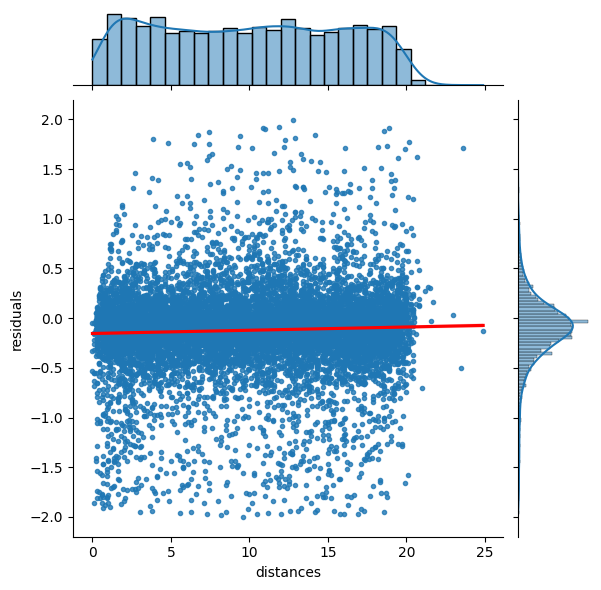

In [112]:
sns.jointplot(df_clean, x='distances', y='residuals', kind='reg', marker=".", line_kws=dict(color="r"), )

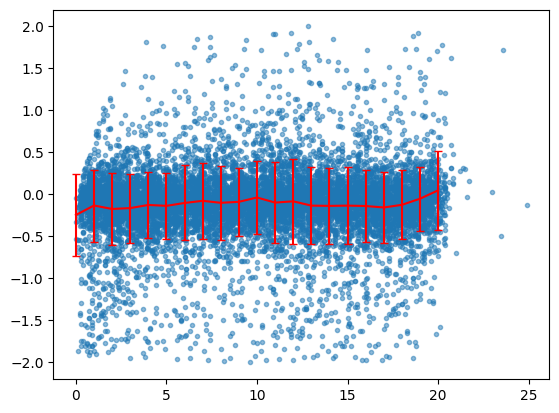

In [30]:
x = np.linspace(0, 20, 21)

y = np.zeros_like(x)
erry = np.zeros_like(x)
for i in x:
    y[int(i)] = np.mean(df_clean[(df_clean['distances']>=i) & ( df_clean['distances']< i+1)]['residuals'])
    erry[int(i)] = np.std(df_clean[(df_clean['distances']>=i) & ( df_clean['distances']< i+1)]['residuals'])

plt.errorbar(x, y, erry, color='r', capsize=3, fmt='-')
plt.scatter(df_clean['distances'], df_clean['residuals'], marker='.', alpha=0.5)
plt.show()